#Part 0 Import files & libraries

In [40]:
from google.colab import files
uploaded = files.upload()

Saving Covid19-vaccination.csv to Covid19-vaccination.csv


In [41]:
uploaded1 = files.upload()

Saving Complete_covid19_dataset.csv to Complete_covid19_dataset.csv


In [42]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Covid19-vaccination.csv')
df_complete = pd.read_csv('/content/drive/MyDrive/Complete_covid19_dataset.csv')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [44]:
!pip install pmdarima

In [45]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

#Part 1 Data Cleaning

In [46]:
#Drop total_vaccinations and total_vaccinations_per_hundred missing data, as without these values any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)
df = df.drop(df[df.total_vaccinations_per_hundred.isna()].index)

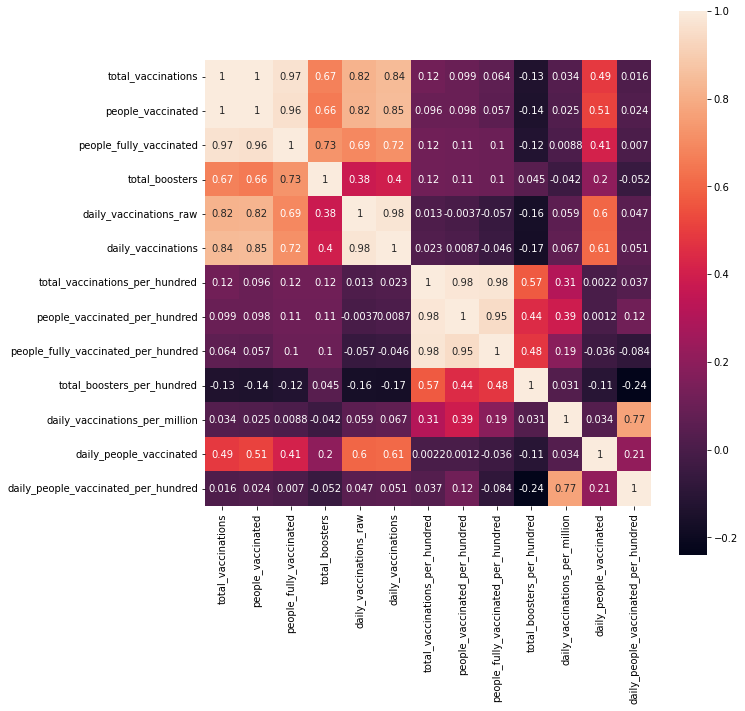

In [47]:
#correlation matrix
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

From the heat map above, we see that there is high correlation between

(1) total_vaccinated & people_vaccinated

(2) total_vaccinations and people_fully_vaccinated

(3) total_vaccinations and daily_vaccinations_raw

(4) total_vaccinations and daily_vaccinations

(5) people_vaccinated and people_fully_vaccinated

(6) people_vaccinated and daily_vaccinations_raw

(7) people_vaccinated and daily_vaccinations

(8) daily_vaccinations_raw and daily_vaccinations

(9) total_vaccinations_per_hundred and people_vaccinated_per_hundred

(10) total_vaccinations_per_hundred and people_fully_vaccinated_per_hundred

(11) people_vaccinated_per_hundred and people_fully_vaccinated_per_hundred

For each pair, remove the nann values and use another heat map to see whether the correlation has been maintained or not. Then, perform a statistical test to determine if they are statisitically similar.


###total_vaccinated & people_vaccinated

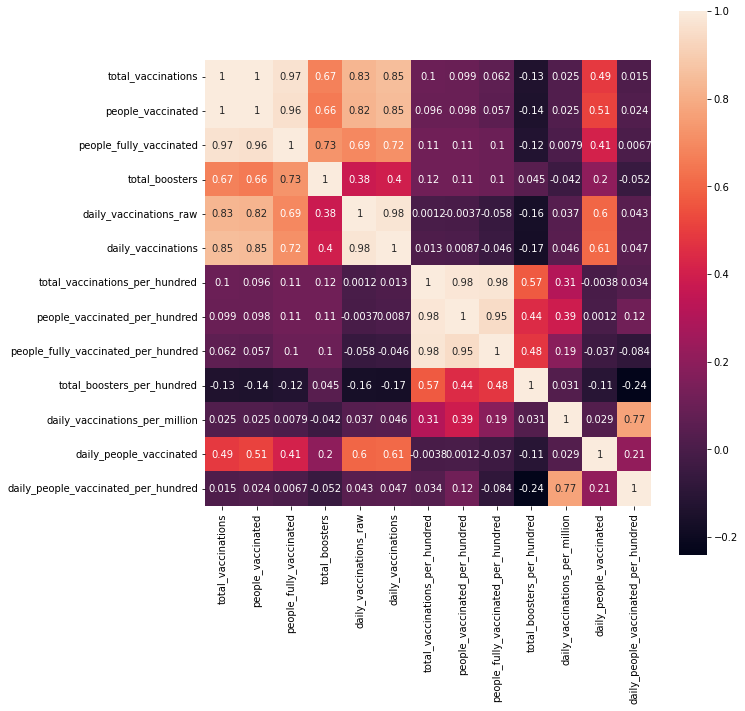

4.1602872837396384e-83


In [48]:
check_df = df.drop(df[df.people_vaccinated.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations'], check_df['people_vaccinated'], alternative='two-sided')[1]
print(pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###total_vaccinations and people_fully_vaccinated

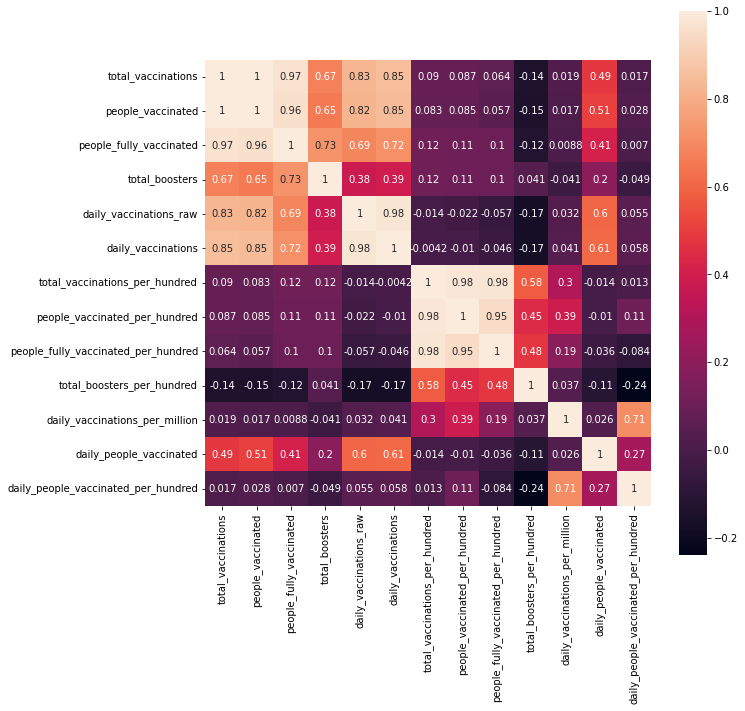

P-value = 0.0


In [49]:
#total_vaccinations and people_fully_vaccinated
check_df = df.drop(df[df.people_fully_vaccinated.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations'], check_df['people_fully_vaccinated'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###total_vaccinations and daily_vaccinations_raw

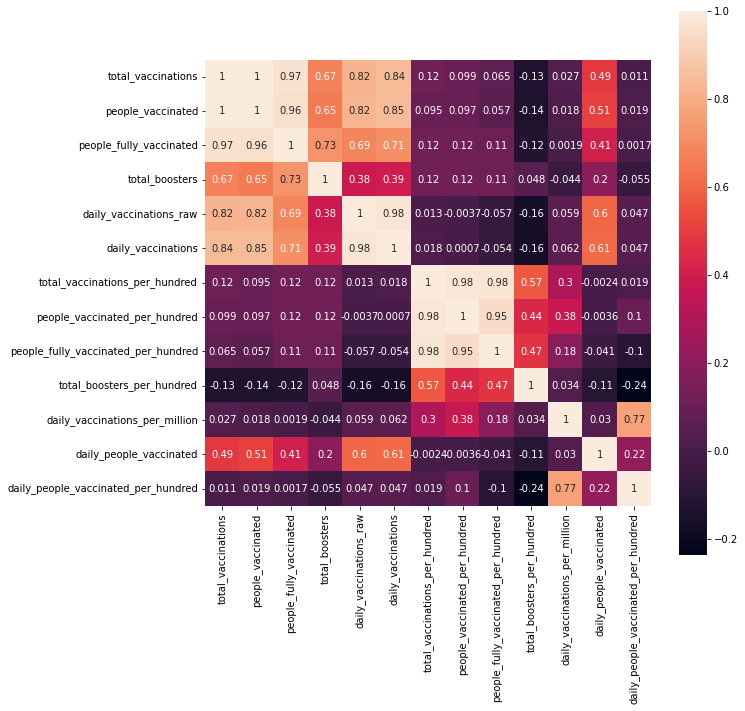

P-value = 0.0


In [50]:
#total_vaccinations and daily_vaccinations_raw
check_df = df.drop(df[df.daily_vaccinations_raw.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations'], check_df['daily_vaccinations_raw'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###total_vaccinations and daily_vaccinations

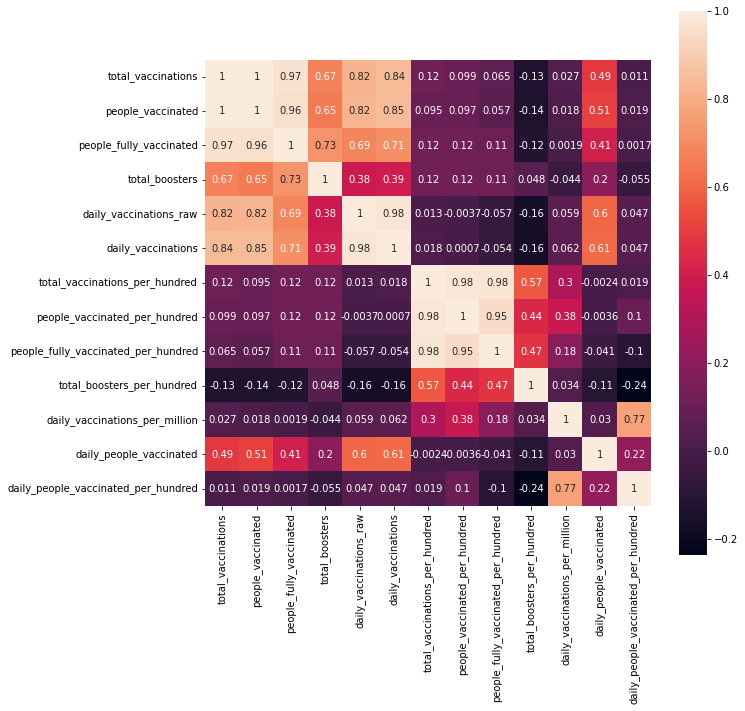

P-value = 0.0


In [51]:
#total_vaccinations and daily_vaccinations
check_df = df.drop(df[df.daily_vaccinations_raw.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations'], check_df['daily_vaccinations'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###people_vaccinated and people_fully_vaccinated

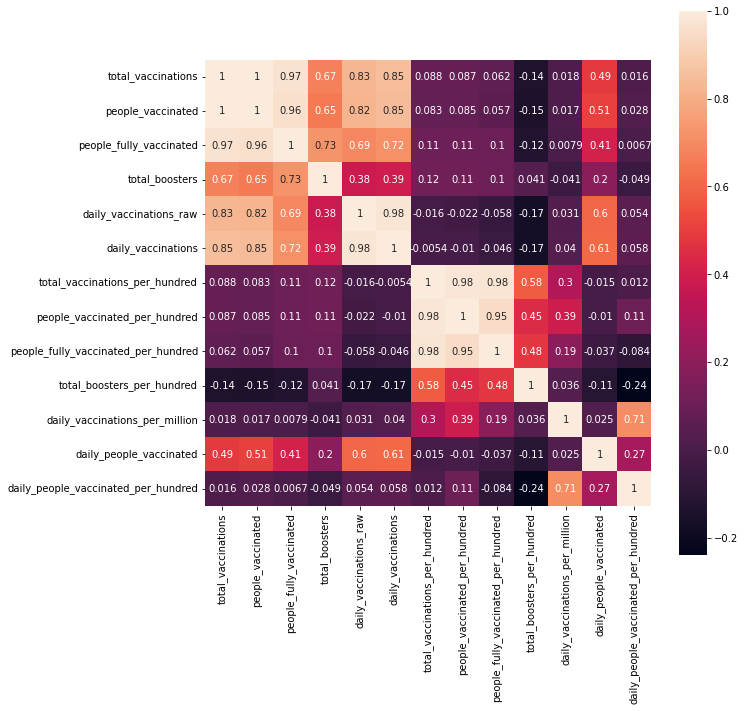

P-value = 1.0311410996242844e-224


In [52]:
#people_vaccinated and people_fully_vaccinated
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df = check_df.drop(check_df[check_df.people_fully_vaccinated.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['people_vaccinated'], check_df['people_fully_vaccinated'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###people_vaccinated and daily_vaccinations_raw

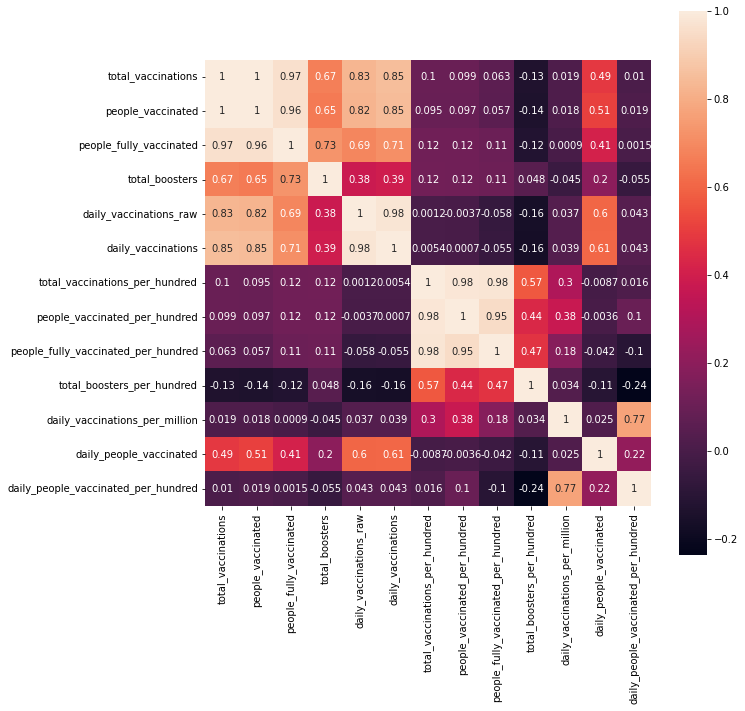

P-value = 0.0


In [53]:
#people_vaccinated and daily_vaccinations_raw
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df = check_df.drop(check_df[check_df.daily_vaccinations_raw.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['people_vaccinated'], check_df['daily_vaccinations_raw'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###people_vaccinated and daily_vaccinations

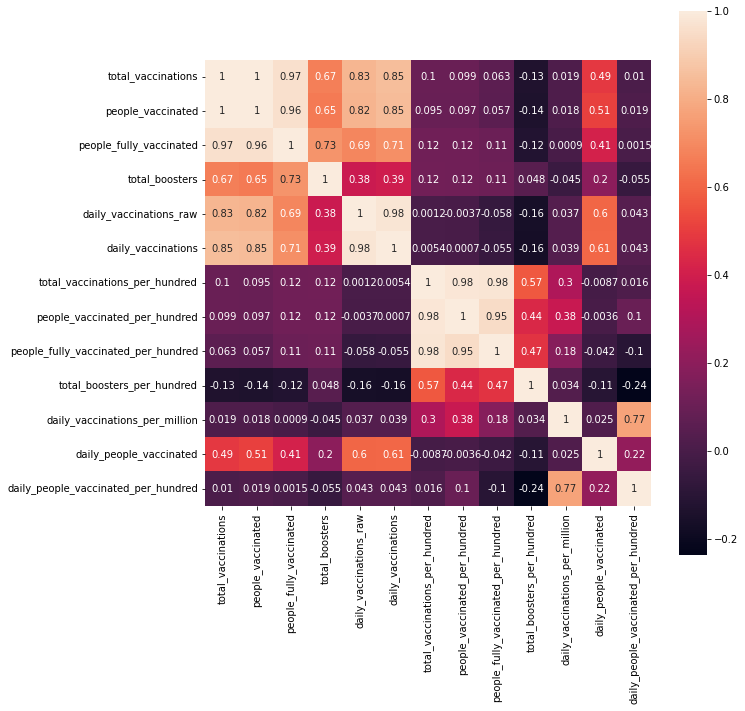

P-value = 0.0


In [54]:
#people_vaccinated and daily_vaccinations
check_df = df.drop(df[df.people_vaccinated.isna()].index)
check_df = check_df.drop(check_df[check_df.daily_vaccinations_raw.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['people_vaccinated'], check_df['daily_vaccinations'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###daily_vaccinations_raw and daily_vaccinations

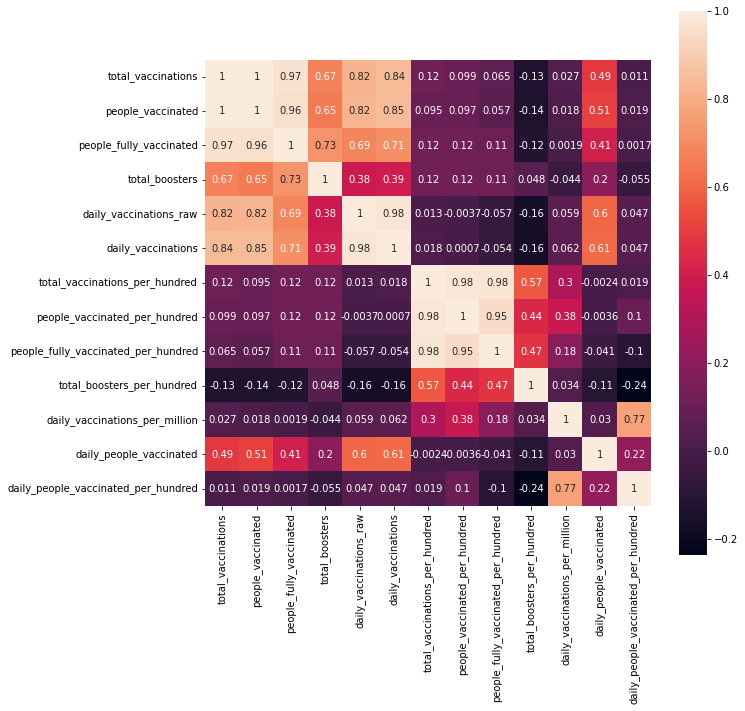

P-value = 1.7924498806068453e-07


In [55]:
#daily_vaccinations_raw and daily_vaccinations
check_df = df.drop(df[df.daily_vaccinations_raw.isna()].index)
check_df = check_df.drop(check_df[check_df.daily_vaccinations.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['daily_vaccinations_raw'], check_df['daily_vaccinations'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###total_vaccinations_per_hundred and people_vaccinated_per_hundred

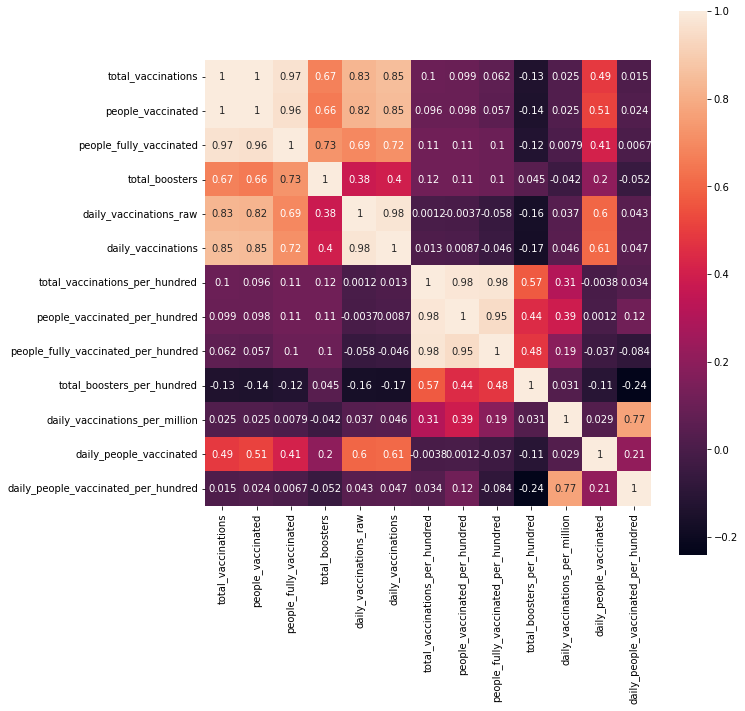

P-value = 0.0


In [56]:
#total_vaccinations_per_hundred and people_vaccinated_per_hundred
check_df = df.drop(df[df.people_vaccinated_per_hundred.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_vaccinated_per_hundred'], alternative='two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###total_vaccinations_per_hundred and people_fully_vaccinated_per_hundred

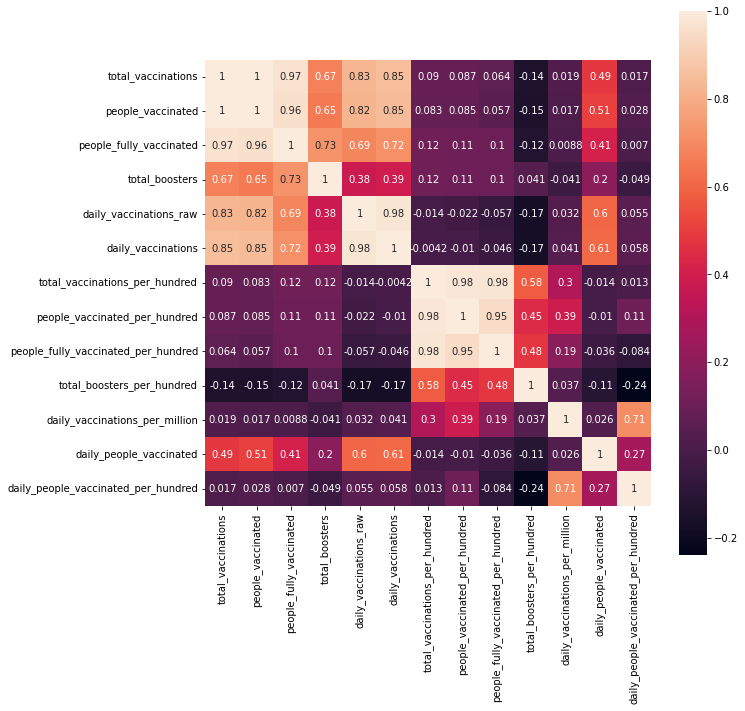

P-value = 0.0


In [57]:
#total_vaccinations_per_hundred and people_fully_vaccinated_per_hundred
check_df = df.drop(df[df.people_fully_vaccinated_per_hundred.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_fully_vaccinated_per_hundred'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###people_vaccinated_per_hundred and people_fully_vaccinated_per_hundred

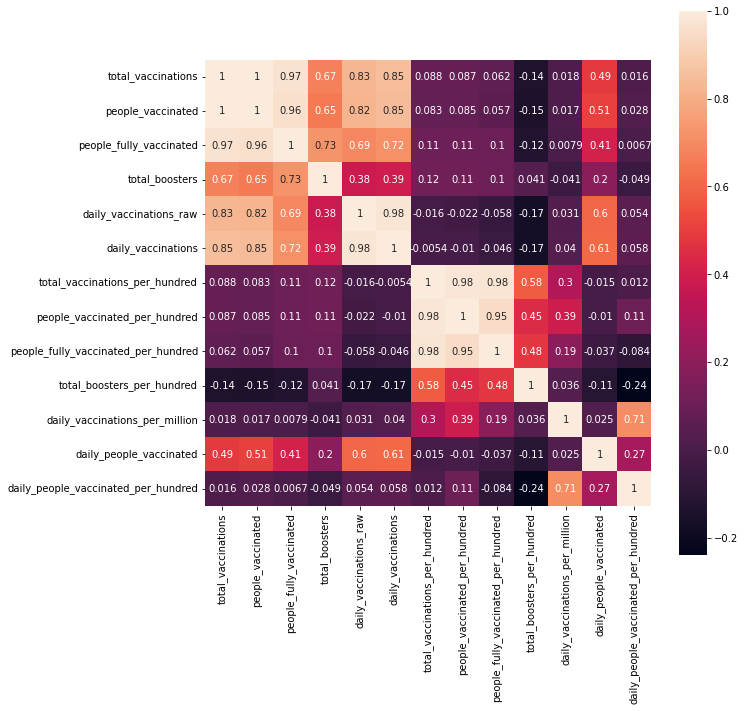

P-value = 0.0


In [58]:
#people_vaccinated_per_hundred and people_fully_vaccinated_per_hundred
check_df = df.drop(df[df.people_vaccinated_per_hundred.isna()].index)
check_df = check_df.drop(check_df[check_df.people_fully_vaccinated_per_hundred.isna()].index)
plt.subplots(figsize=(10, 10))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()
pvalue = stats.mannwhitneyu(check_df['people_vaccinated_per_hundred'], check_df['people_fully_vaccinated_per_hundred'], alternative = 'two-sided')[1]
print('P-value =', pvalue)

From new confusion matrix, correlation has been maintained with dropped nan values. From Mann Whitney U-Test, the p-value is < 0.05. Therefore, they are not distributed simularily and we should replace nan values with 0s. 

###Fill NaN values

In [59]:
#for all features with no correlation as shown in the confusion matrix and no correlation show through Mann Whitney U-test, replace NaN values with zeros
df.people_vaccinated = df.people_vaccinated.fillna(0)
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)
df.total_boosters = df.total_boosters.fillna(0)
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.total_vaccinations_per_hundred = df.total_vaccinations_per_hundred.fillna(0)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.total_boosters_per_hundred = df.total_boosters_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.daily_people_vaccinated = df.daily_people_vaccinated.fillna(0)
df.daily_people_vaccinated_per_hundred = df.daily_people_vaccinated_per_hundred.fillna(0)

In [60]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,0.0,1367.0,0.02,0.02,0.0,0.0,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,0.0,2862.0,0.14,0.14,0.0,0.0,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,0.0,3000.0,0.30,0.30,0.0,0.0,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,0.0,8000.0,0.60,0.60,0.0,0.0,201.0,8000.0,0.020


#Part 2 Data Visualization & EDA

###Figure 1

In [61]:
pip install dataprep

     |████████████████████████████████| 3.5 MB 4.1 MB/s 
     |████████████████████████████████| 1.1 MB 44.1 MB/s 
     |████████████████████████████████| 719 kB 52.4 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 1.5 MB 69.3 MB/s 
     |████████████████████████████████| 10.1 MB 19.4 MB/s 
     |████████████████████████████████| 158 kB 65.4 MB/s 
     |████████████████████████████████| 848 kB 15.9 MB/s 
     |████████████████████████████████| 943 kB 42.6 MB/s 
     |████████████████████████████████| 366 kB 45.8 MB/s 
     |████████████████████████████████| 192 kB 52.8 MB/s 
     |████████████████████████████████| 271 kB 36.4 MB/s 
     |████████████████████████████████| 160 kB 51.9 MB/s 
     |████████████████████████████████| 132 kB 63.7 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 1.5 MB 52.9 MB/s 
     |████████████████████████████████| 743 kB 67.6 MB/s 
  Created wheel fo

In [62]:
#Not all values in column 'location' are actual countries. Get a list of 'real_countries'
from dataprep.clean import validate_country

real_countries = []

for i in df['location'].unique():
  if validate_country(i) == True:
    real_countries.append(i)

NumExpr defaulting to 2 threads.


Graph that shows the top 10 countries and Canada in the world with highest people vaccinated **per hundred**. I chose per hundred because this would normalize the data and account for the fact that countries with higher populations have higher number of people vaccinated so it would a more fair comparison

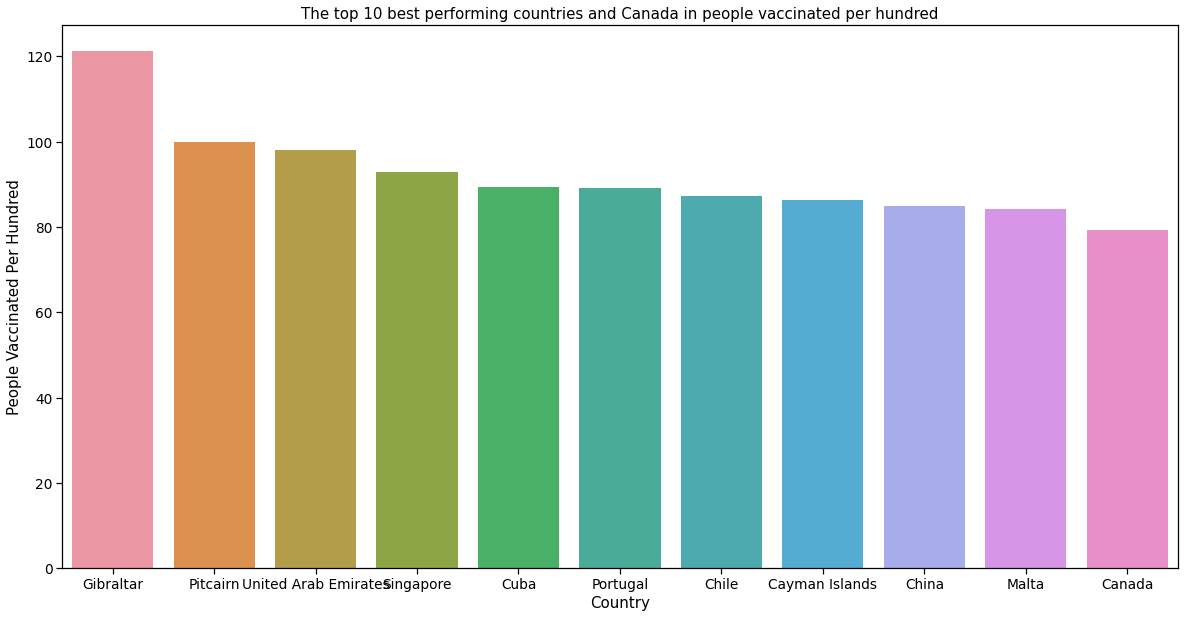

In [63]:
top_daily = df.groupby('location').people_vaccinated_per_hundred.max().sort_values(ascending=False)
top_daily_f = top_daily.dropna(axis='rows').reset_index() # Dropping NaN values
top_daily_f = top_daily_f[top_daily_f['location'].isin(real_countries)] #remove all rows that aren't actual countries

# Plotting the data
with sns.plotting_context('notebook', font_scale = 1.25):
    plt.figure(figsize=(20, 10))
    plt.title('The top 10 best performing countries and Canada in people vaccinated per hundred')
    sns.barplot(x=top_daily_f['location'].iloc[:10].append(top_daily_f[top_daily_f['location'] == 'Canada'].iloc[:,0]), 
                y=top_daily_f['people_vaccinated_per_hundred'].iloc[:10].append(top_daily_f[top_daily_f['location'] == 'Canada'].iloc[:,1]))
    plt.xlabel('Country')
    plt.ylabel('People Vaccinated Per Hundred');

How might these trends be used to aid in the task of methodically extracting all relevant data and trends?

Creating this chart helps me understand how Canada compares in terms of people vaccinated per hundred with the top 10 countries in this metric. We are doing good in comparison at approx 80 per hundred. If we are to simply measure the metric 'people vaccinated', we would not be doing as well as other countries like China and USA because they have higher populations so they have higher people vaccinated. 

Note that Gibraltar has a value of 120 people vaccinated per hundred... this does not make sense and should be excluded from our analysis.

###Figure 2


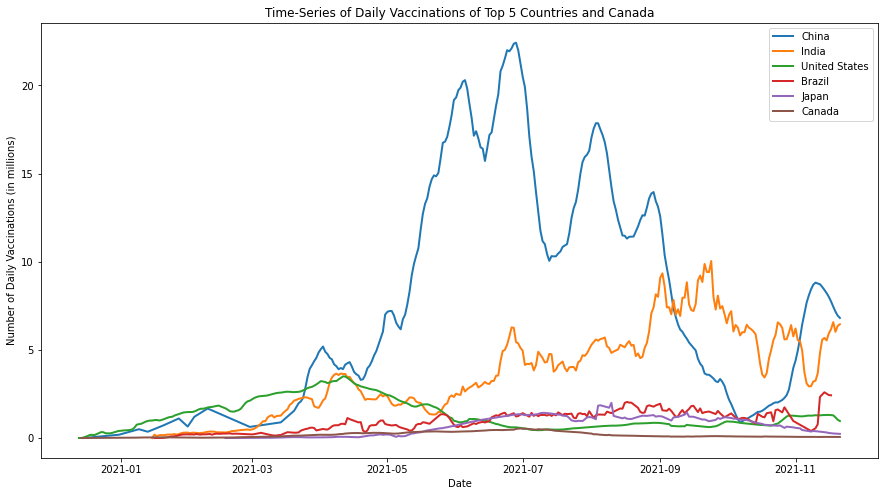

In [64]:
from datetime import datetime

top_daily_vaccinations = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily_vaccinations_f = top_daily_vaccinations.dropna(axis='rows').reset_index() # Dropping NaN values
top_daily_vaccinations_f = top_daily_vaccinations_f[top_daily_vaccinations_f['location'].isin(real_countries)] #remove all rows that aren't actual countries

plt.figure(figsize=(15,8))

for i in top_daily_vaccinations_f['location'][:5]:
  df_country = df.loc[df['location']==i]
  date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_country['date']]

  plt.plot_date(date_objects, df_country['daily_vaccinations']/1000000, linewidth = 2, fmt='-', label = i)

df_country = df.loc[df['location']=='Canada']
date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_country['date']]
plt.plot_date(date_objects, df_country['daily_vaccinations']/1000000, linewidth = 2, fmt='-', label = 'Canada')

plt.title('Time-Series of Daily Vaccinations of Top 5 Countries and Canada')
plt.xlabel('Date')
plt.ylabel('Number of Daily Vaccinations (in millions)')
plt.legend()
plt.show()

How might these trends be used to aid in the task of methodically extracting all relevant data and trends?

Daily vaccination is the total number of vaccinations administered each day. This graph is helpful to compare Canada and the top 5 countries with the highest peak daily vaccinations. Since I'd have to analyze another country in addition to Canada, it is helpful to generate this graph to understand the magnitude of the top 10 countries. For example, China has the highest peak at over 20 million per day at approx. July 2021, which makes sense given their large population. There is also a lot of fluctuations with China's daily vaccinations over time, whereas Canada's is more stable.

###Figure 3

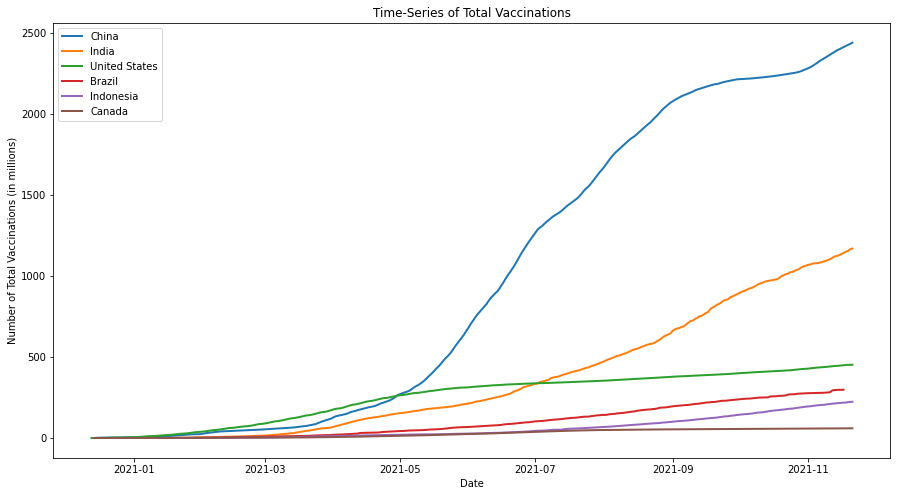

In [65]:
top_total_vaccinations = df.groupby('location').total_vaccinations.max().sort_values(ascending=False)
top_total_vaccinations_f = top_total_vaccinations.dropna(axis='rows').reset_index() # Dropping NaN values
top_total_vaccinations_f = top_total_vaccinations_f[top_total_vaccinations_f['location'].isin(real_countries)] #remove all rows that aren't actual countries

plt.figure(figsize=(15,8))

for i in top_total_vaccinations_f['location'][:5]:
  df_country = df.loc[df['location']==i]
  date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_country['date']]
  plt.plot_date(date_objects, df_country['total_vaccinations']/1000000, linewidth = 2, fmt='-', label = i)


df_country = df.loc[df['location']=='Canada']
date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_country['date']]
plt.plot_date(date_objects, df_country['total_vaccinations']/1000000, linewidth = 2, fmt='-', label = 'Canada')

plt.title('Time-Series of Total Vaccinations')
plt.xlabel('Date')
plt.ylabel('Number of Total Vaccinations (in millions)')
plt.legend()
plt.show()

How might these trends be used to aid in the task of methodically extracting all relevant data and trends?

Total vaccination is the total accumulated number of vaccinations administered. This graph is helpful to compare Canada and the top 5 countries with the highest vaccinations to-date. Similar to Figure 2, since I'd have to analyze another country in addition to Canada, it is helpful to generate this graph to understand the magnitude of total vaccinations from the top 5 countries. China has the highest total at over 2.5 billion, which makes sense given their large population. We should take this factor of population size into consideration if comparing Canada with a highly populated country in the later sections.

###Figure 4

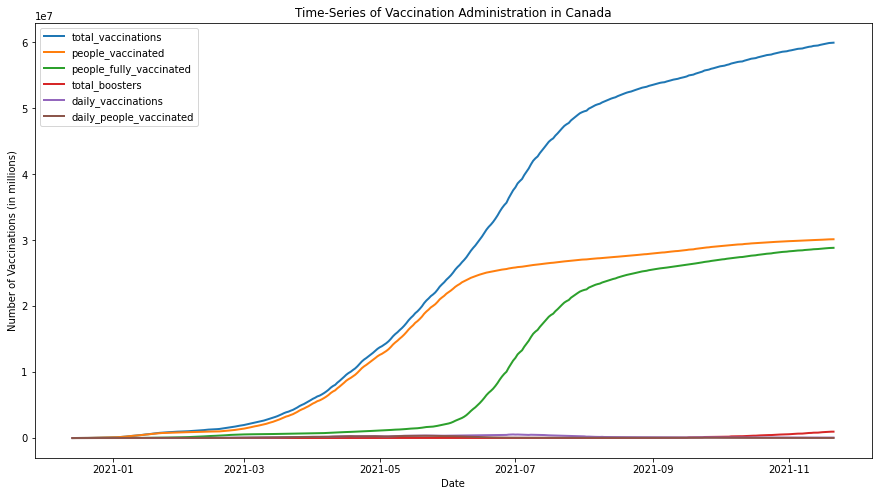

In [66]:
df_Canada = df.loc[df['location']=='Canada']

date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_Canada['date']]

features_of_interest = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'daily_vaccinations', 'daily_people_vaccinated']

plt.figure(figsize=(15,8))

for i in range(3, len(df_Canada.columns)):
  if df_Canada.columns[i] in features_of_interest:
    plt.plot_date(date_objects, df_Canada.iloc[:,i], linewidth = 2, fmt='-', label = df_Canada.columns[i])

plt.title('Time-Series of Vaccination Administration in Canada')
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations (in millions)')
plt.legend()
plt.show()

How might these trends be used to aid in the task of methodically extracting all relevant data and trends? 

Since Canada's features will be assessed in Part 3 to forecast the number of people vaccinated in the next 50 days, it is important to visualize each of the features that may help us answer this question on a graph. We see that total vaccinations is the highest and increasing. It is higher than people_vaccinated because people_vaccinated would not increase if a person receives their second dose. We also see that daily vaccinations and daily people vaccinated are low because these are the daily rates, which can increase or decrease throughout the days. 

The 'total_vaccinations', 'people_vaccinated', and 'people_fully_vaccinated' also have a steeper inclince around March and August 2021. At the beginning introduction of vaccinations, we see that there is a slower incline for these features. 

#Part 3 - Model selection and fitting to data

##Canada

###Using daily_people_vaccinated feature

Justification for this feature: daily_people displays the number of people that are vaccinated each day (ie. daily rate). Therefore, it is logicial to choose this feature to forecast the 'vaccination rates' in the future as asked by the question. It can also help us forecast how many people will be vaccinated in the next 50 days.


In [67]:
sndf_Canada = df[df['location']=='Canada']

In [68]:
#Get the values from the column where vaccination rate of Canada is stored.
val_Canada = sndf_Canada['daily_people_vaccinated'].values

In [69]:
model_Canada = pm.auto_arima(val_Canada, start_p=1, start_q=1, 
                            test='adf', # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1, # frequency of series
                            d=None, # let model determine 'd'
                            seasonal=False, # No Seasonality
                            start_P=0,
                            D=None,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(model_Canada.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6431.860, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6761.533, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6455.570, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6624.083, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6759.562, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6431.388, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6430.410, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6430.239, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6430.883, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=6428.240, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=6428.411, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=6428.883, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6429.389, Time=0.12 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.477 seconds
                      

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,1,0). Ie. the p-value (number of lag observtations / lag order) is 3, the d-value (number of times the raw observations are differenced) is 1, and the q-value (size of moving average window / moving average) is 0.

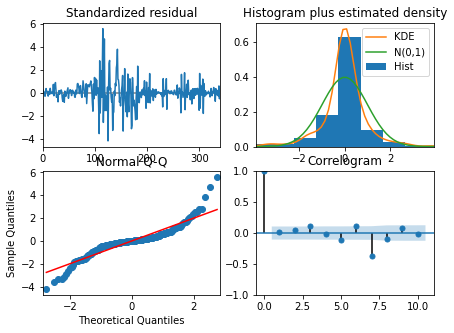

In [70]:
model_Canada.plot_diagnostics(figsize=(7,5))
plt.show()

From top-left graph, std residual error converges to zero (good). 
From top-right graph, the probability distribution of residual error follows normal distribution with approx mean close to 0 (good).
From bottom-left graph, the Q-Q plot shows that this is higly correlated with a normal distribution (good). 
From bottom-right graph, correlogram is the auto correlation for the residual error. If the correlation between the residual error are higher than the significance threshold, then we say that it is not good. In this case, there is one point that is not in the significance threshold (at x = 7.5). Therefore, there may be some pattern that this model may cannot capture and may not be best. However, let's just plot the forecast to see what we get. 

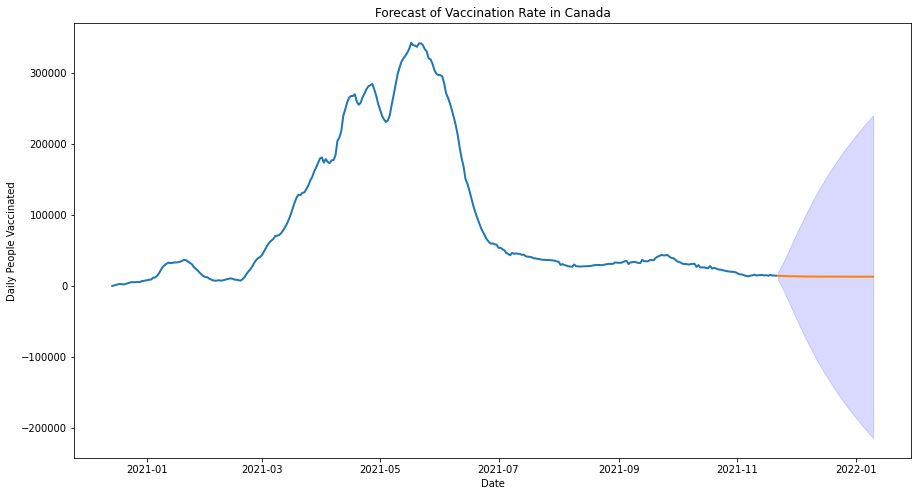

In [71]:
from datetime import datetime, timedelta

date_objects_Canada = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_Canada['date']]
date_objects1_Canada = [date_objects_Canada[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_Canada, confint_Canada = model_Canada.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.05) #95% Confidence Interval
index_of_fc_Canada = np.arange(len(val_Canada), len(val_Canada)+n_periods)

# make series for plotting purpose
fc_series_Canada = pd.Series(fc_Canada, index=index_of_fc_Canada)
lower_series_Canada = pd.Series(confint_Canada[:, 0], index=index_of_fc_Canada)
upper_series_Canada = pd.Series(confint_Canada[:, 1], index=index_of_fc_Canada)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_Canada, val_Canada, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_Canada[1:], fc_series_Canada, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_Canada[1:], lower_series_Canada, upper_series_Canada, color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate in Canada")
plt.ylabel('Daily People Vaccinated')
plt.xlabel('Date')
plt.show()

With a 95% CI, it shows a negative projection (decrease in number of people vaccinated) in the worst case scenario. This does not make sense. 

Also, the base case vaccination rates appears to be flat over the next 50 days at between 13,000 - 14,000/day over the next 50 days. The forecast does not appear to consider the large 'hill' or fluctuation in vaccination rates between 2021-03 and 2021-07 where there was a large spike and a drop. This may be because of the limited number of lagged observations considered in the training model.

Therefore, this feature may not be the most suitable.

Lets try another feature. 

###Using people_vaccinated feature

Justification of this feature selection: people_vaccinated represents the number of total people that are vaccinated each day. It is an accumulated number and should answer the question well of "how many people will be vaccinated in the next 50 days in each country?"

In [72]:
sndf_Canada = df[df['location']=='Canada']

In [73]:
#Get the values from the column where people vaccinated of Canada is stored.
val_Canada = sndf_Canada['people_vaccinated'].values

In [74]:
model_Canada = pm.auto_arima(val_Canada, start_p=1, start_q=1, 
                            test='adf', # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1, # frequency of series
                            d=None, # let model determine 'd'
                            seasonal=False, # No Seasonality
                            start_P=0,
                            D=None,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            alpha=0.05)
print(model_Canada.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8806.147, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12528.542, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12281.342, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8008.397, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7991.769, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=8740.225, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=7989.107, Time=0.40 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=7990.057, Time=0.60 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 4.870 seconds
                               SARIMAX Result

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,0,2). Ie. the p-value (number of lag observtations / lag order) is 3, the d-value (number of times the raw observations are differenced) is 0, and the q-value (size of moving average window / moving average) is 2.

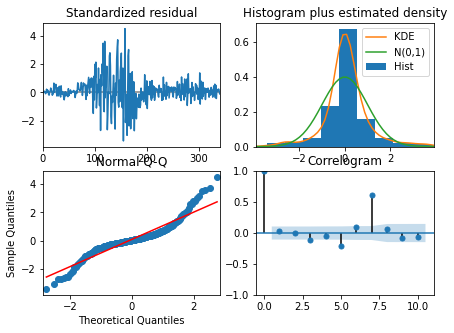

In [75]:
model_Canada.plot_diagnostics(figsize=(7,5))
plt.show()

From top-left graph, std residual error converges to zero (good). 
From top-right graph, the probability distribution of residual error follows normal distribution with approx mean close to 0 (good).
From bottom-left graph, the Q-Q plot shows that this is higly correlated with a normal distribution (good). 
From bottom-right graph, however, in this case, there is one point that is not in the significance threshold (at x = 7.5). Therefore, there may be some pattern that this model cannot capture and may not be best. However, let's just plot the forecast to see what we get. 

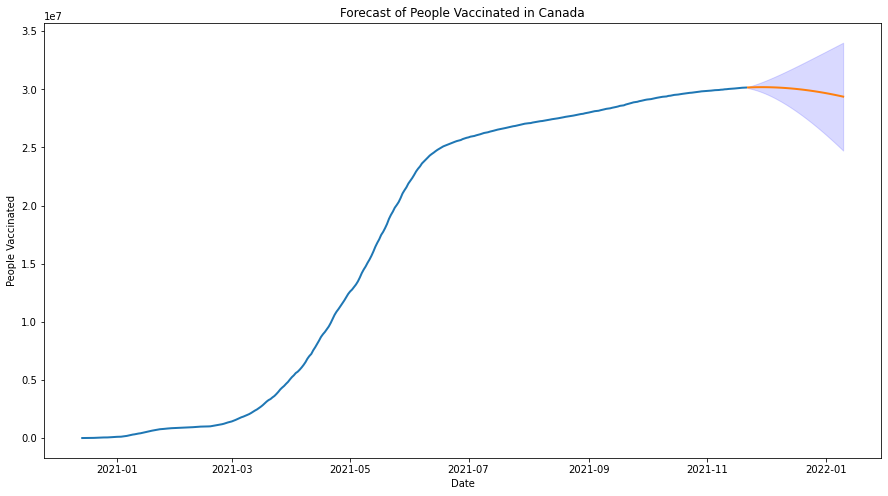

In [76]:
date_objects_Canada = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_Canada['date']]
date_objects1_Canada = [date_objects_Canada[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_Canada, confint_Canada = model_Canada.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.05) #95% Confidence Interval
index_of_fc_Canada = np.arange(len(val_Canada), len(val_Canada)+n_periods)

# make series for plotting purpose
fc_series_Canada = pd.Series(fc_Canada, index=index_of_fc_Canada)
lower_series_Canada = pd.Series(confint_Canada[:, 0], index=index_of_fc_Canada)
upper_series_Canada = pd.Series(confint_Canada[:, 1], index=index_of_fc_Canada)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_Canada, val_Canada, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_Canada[1:], fc_series_Canada, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_Canada[1:], lower_series_Canada, upper_series_Canada, color='b', alpha=.15)
plt.title("Forecast of People Vaccinated in Canada")
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.show()

In [77]:
print('people presently vaccinated:', round(val_Canada[-1]))

people presently vaccinated: 30152206


In [78]:
print('people vaccinated in the next 50 days (base case):', round(fc_series_Canada.iloc[-1]))
print('people vaccinated in the next 50 days (base case):', round(lower_series_Canada.iloc[-1]))

people vaccinated in the next 50 days (base case): 29370688
people vaccinated in the next 50 days (base case): 24728818


There is a decreasing projection with the base-case. This does not make sense because the number of people vaccinated cannot decrease. Let's decrease the 'alpha' parameter in the model, which is the 'level of the test for testing significance'. A consequence of this solution is that the test level significance decreases, but is necessary to achieve a non-negative rate of people vaccinated. 

Try lowering the alpha value when fitting the data

In [79]:
model_Canada = pm.auto_arima(val_Canada, start_p=1, start_q=1, 
                            test='adf', # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1, # frequency of series
                            d=None, # let model determine 'd'
                            seasonal=False, # No Seasonality
                            start_P=0,
                            D=None,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            alpha=0.000001) #decrease alpha / level of the test for testing significance = 0.000001
print(model_Canada.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=7934.025, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=7986.414, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=7966.708, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=7943.853, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7984.420, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=7931.500, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7942.268, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=7933.475, Time=0.28 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=7925.725, Time=0.55 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=7926.622, Time=0.30 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=7927.246, Time=0.60 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=7878.765, Time=1.23 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=7929.955, Time=0.38 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=7867.094, Time=1.05 sec
 ARIMA(3,2,3)(0,0,0)[0]          

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,2,3). Ie. the p-value (number of lag observtations / lag order) is 3, the d-value (number of times the raw observations are differenced) is 2, and the q-value (size of moving average window / moving average) is 3.

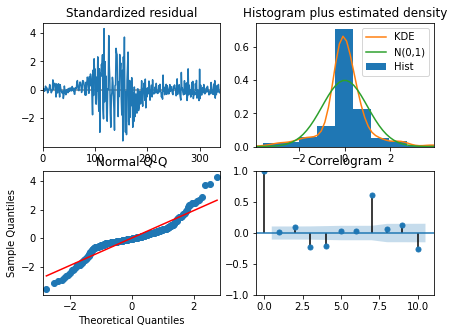

In [80]:
model_Canada.plot_diagnostics(figsize=(7,5))
plt.show()

From top-left graph, std residual error converges to zero (good). 
From top-right graph, the probability distribution of residual error follows normal distribution with approx mean close to 0 (good).
From bottom-left graph, the Q-Q plot shows that this is higly correlated with a normal distribution (good). 
From bottom-right graph, however, in this case, there is one point that is not in the significance threshold (at x = 7.5). Therefore, there may be some pattern that this model cannot capture and may not be best. However, let's just plot the forecast to see what we get. 

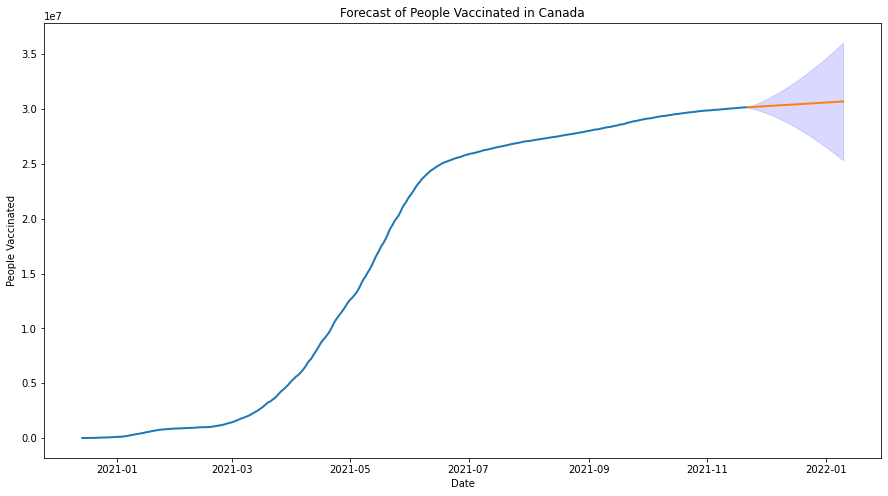

In [81]:
date_objects_Canada = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_Canada['date']]
date_objects1_Canada = [date_objects_Canada[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_Canada, confint_Canada = model_Canada.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.05) #95% Confidence Interval
index_of_fc_Canada = np.arange(len(val_Canada), len(val_Canada)+n_periods)

# make series for plotting purpose
fc_series_Canada = pd.Series(fc_Canada, index=index_of_fc_Canada)
lower_series_Canada = pd.Series(confint_Canada[:, 0], index=index_of_fc_Canada)
upper_series_Canada = pd.Series(confint_Canada[:, 1], index=index_of_fc_Canada)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_Canada, val_Canada, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_Canada[1:], fc_series_Canada, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_Canada[1:], lower_series_Canada, upper_series_Canada, color='b', alpha=.15)
plt.title("Forecast of People Vaccinated in Canada")
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.show()

In [82]:
print("People vaccinated in Canada in next 50 days:")
print("Worst case scenario:", round(lower_series_Canada.iloc[-1]))
print("Base case scenario:", round(fc_series_Canada.iloc[-1]))
print("Best case scenario:", round(upper_series_Canada.iloc[-1]))

People vaccinated in Canada in next 50 days:
Worst case scenario: 25324331
Base case scenario: 30685471
Best case scenario: 36046611


There is now not an increase in the projection in people_vaccinated for the base case. However, there is a decreasing projection with the worst-case. This does not make sense because the number of people vaccinated cannot decrease for the worst case. Lets try to reduce the CI from 95%. 

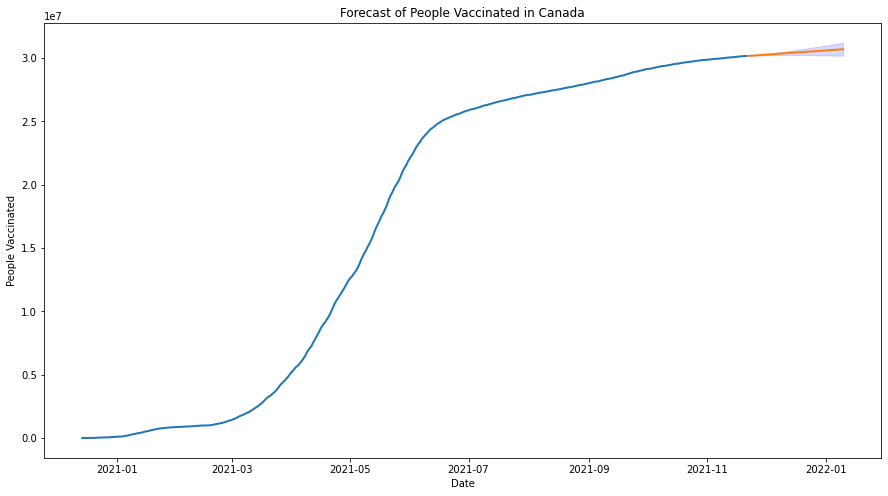

In [83]:
date_objects_Canada = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_Canada['date']]
date_objects1_Canada = [date_objects_Canada[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_Canada, confint_Canada = model_Canada.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.85) #15% Confidence Interval
index_of_fc_Canada = np.arange(len(val_Canada), len(val_Canada)+n_periods)

# make series for plotting purpose
fc_series_Canada = pd.Series(fc_Canada, index=index_of_fc_Canada)
lower_series_Canada = pd.Series(confint_Canada[:, 0], index=index_of_fc_Canada)
upper_series_Canada = pd.Series(confint_Canada[:, 1], index=index_of_fc_Canada)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_Canada, val_Canada, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_Canada[1:], fc_series_Canada, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_Canada[1:], lower_series_Canada, upper_series_Canada, color='b', alpha=.15)
plt.title("Forecast of People Vaccinated in Canada")
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.show()

In [84]:
print('People vaccinated in Canada currently:', val_Canada[-1])

People vaccinated in Canada currently: 30152206.0


In [85]:
print("People vaccinated in Canada in next 50 days:")
print("Worst case scenario:", round(lower_series_Canada.iloc[-1]))
print("Base case scenario:", round(fc_series_Canada.iloc[-1]))
print("Best case scenario:", round(upper_series_Canada.iloc[-1]))

People vaccinated in Canada in next 50 days:
Worst case scenario: 30168170
Base case scenario: 30685471
Best case scenario: 31202771


With a 15% CI, the worst case scenario is finally not less than the current number of people vaccinated. However, this is a very low confidence interval which may not be good in capturing the actual expectation. This affects the best case scenario as well, because it limits the upper bound. 

##USA

###Use people_vaccinated feature to be consistent with the last Canadian model above

In [86]:
sndf_USA = df[df['location']=='United States']

In [87]:
#Get the values from the column where vaccination rate of United States is stored.
val_USA = sndf_USA['people_vaccinated'].values

In [88]:
model_USA = pm.auto_arima(val_USA, start_p=1, start_q=1, 
                            test='adf', # use adftest to find optimal 'd'
                            max_p=3, max_q=3, # maximum p and q
                            m=1, # frequency of series
                            d=None, # let model determine 'd'
                            seasonal=False, # No Seasonality
                            start_P=0,
                            D=None,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(model_USA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=9525.162, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=9565.815, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=9559.425, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=9549.936, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9563.821, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=9437.555, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=9517.051, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=9430.940, Time=0.28 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=9502.925, Time=0.09 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=9485.820, Time=0.60 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=9561.362, Time=0.37 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=9428.916, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=9435.524, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=9500.924, Time=0.12 sec
 ARIMA(3,2,2)(0,0,0)[0]          

The best model chosen is : ARIMA (p,d,q) = ARIMA(3,2,1). Ie. the p-value (number of lag observtations / lag order) is 3, the d-value (number of times the raw observations are differenced) is 2, and the q-value (size of moving average window / moving average) is 1.

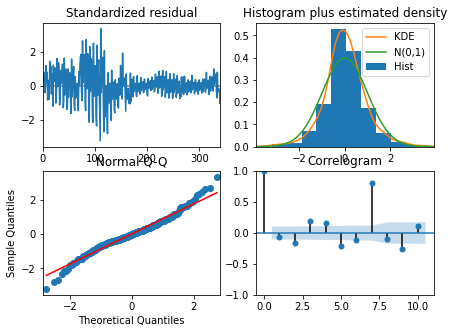

In [89]:
model_USA.plot_diagnostics(figsize=(7,5))
plt.show()

From top-left graph, std residual error converges to zero (good). 
From top-right graph, the probability distribution of residual error follows normal distribution with approx mean close to 0 (good).
From bottom-left graph, the Q-Q plot shows that this is higly correlated with a normal distribution (good). 
From bottom-right graph, however, in this case, there is one point that is just slightly above the significance threshold (at x = 7.3). Therefore, there is not some pattern that this model may not capture and may not be best. However, let's just plot the forecast to see what we get. 

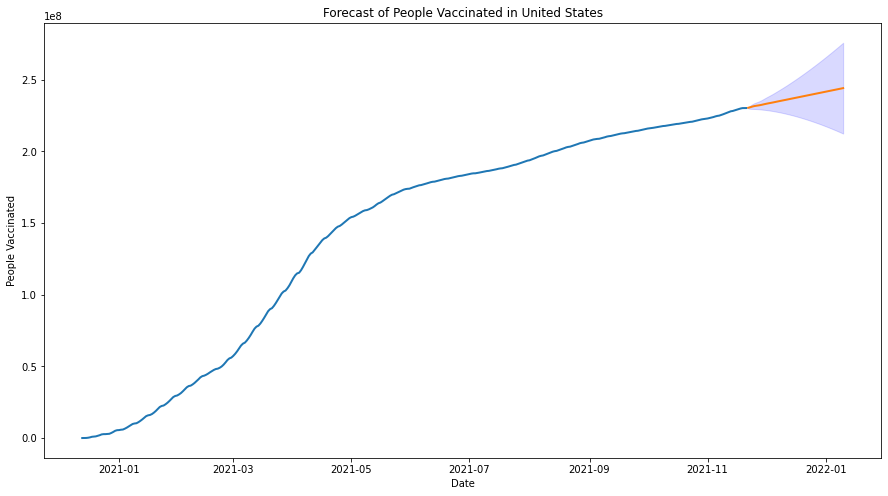

In [90]:
date_objects_USA = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_USA['date']]
date_objects1_USA = [date_objects_USA[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_USA, confint_USA = model_USA.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.05) #95% CI to be consistent with Canadian model
index_of_fc_USA = np.arange(len(val_USA), len(val_USA)+n_periods)

# make series for plotting purpose
fc_series_USA = pd.Series(fc_USA, index=index_of_fc_USA)
lower_series_USA = pd.Series(confint_USA[:, 0], index=index_of_fc_USA)
upper_series_USA = pd.Series(confint_USA[:, 1], index=index_of_fc_USA)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_USA, val_USA, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_USA[1:], fc_series_USA, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_USA[1:], lower_series_USA, upper_series_USA, color='b', alpha=.15)
plt.title("Forecast of People Vaccinated in United States")
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.show()

Using a 40% CI, the worst case scenario does not decrease which makes sense. Lets see how many total vaccinations would be administered in the next 50 days. 

In [91]:
print('People vaccinated in USA currently:', round(val_USA[-1]))

People vaccinated in USA currently: 230298744


In [92]:
print("Total Vaccinations in United States in next 50 days:")
print("Worst case scenario:", round(lower_series_USA.iloc[-1]))
print("Base case scenario:", round(fc_series_USA.iloc[-1]))
print("Best case scenario:", round(upper_series_USA.iloc[-1]))

Total Vaccinations in United States in next 50 days:
Worst case scenario: 212482891
Base case scenario: 244195248
Best case scenario: 275907604


We see that the worst case is less than the current number of people vaccinated, which does not make sense. Lets try to reduce the CI. 

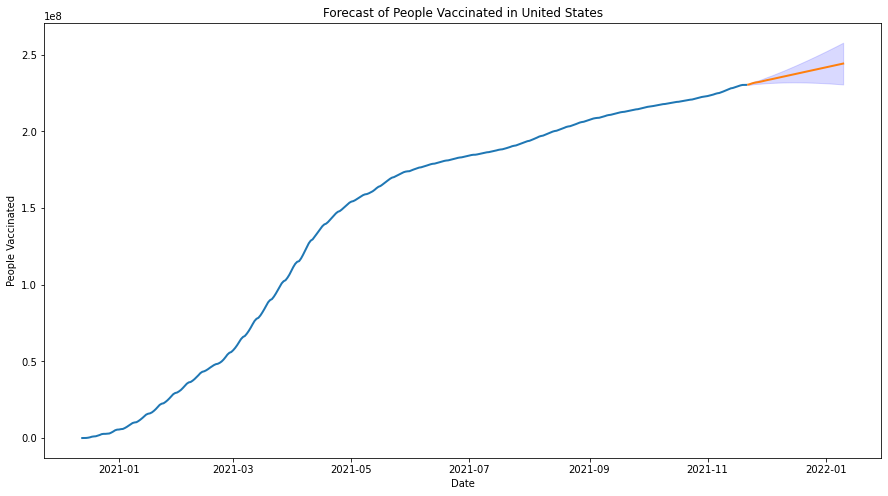

In [93]:
date_objects_USA = [datetime.strptime(date,'%Y-%m-%d').date() for date in sndf_USA['date']]
date_objects1_USA = [date_objects_USA[-1] + timedelta(days=x) for x in range(51)]

# Forecast
n_periods = 50
fc_USA, confint_USA = model_USA.predict(n_periods=n_periods, return_conf_int=True, alpha = 0.4) #60% CI
index_of_fc_USA = np.arange(len(val_USA), len(val_USA)+n_periods)

# make series for plotting purpose
fc_series_USA = pd.Series(fc_USA, index=index_of_fc_USA)
lower_series_USA = pd.Series(confint_USA[:, 0], index=index_of_fc_USA)
upper_series_USA = pd.Series(confint_USA[:, 1], index=index_of_fc_USA)

# Plot
plt.figure(figsize=(15,8))
plt.plot_date(date_objects_USA, val_USA, linewidth = 2, fmt='-')
plt.plot_date(date_objects1_USA[1:], fc_series_USA, linewidth = 2, fmt='-')
plt.fill_between(date_objects1_USA[1:], lower_series_USA, upper_series_USA, color='b', alpha=.15)
plt.title("Forecast of People Vaccinated in United States")
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.show()

In [94]:
print('People vaccinated in USA currently:', round(val_USA[-1]), '\n')
print("Total People Vaccinated in United States in next 50 days:")
print("Worst case scenario:", round(lower_series_USA.iloc[-1]))
print("Base case scenario:", round(fc_series_USA.iloc[-1]))
print("Best case scenario:", round(upper_series_USA.iloc[-1]))

People vaccinated in USA currently: 230298744 

Total People Vaccinated in United States in next 50 days:
Worst case scenario: 230577756
Base case scenario: 244195248
Best case scenario: 257812739


With a 60% CI, the worst case scenario is finally not less than the current number of people vaccinated. However, this is a low confidence interval which may not be good in capturing the actual expectation. This affects the best case scenario as well, because it limits the upper bound. 

#Part 4 Relating COVID-19 Vaccation to a Second Dataset


##Canada

###Compare people_vaccinated and new_cases_smoothed

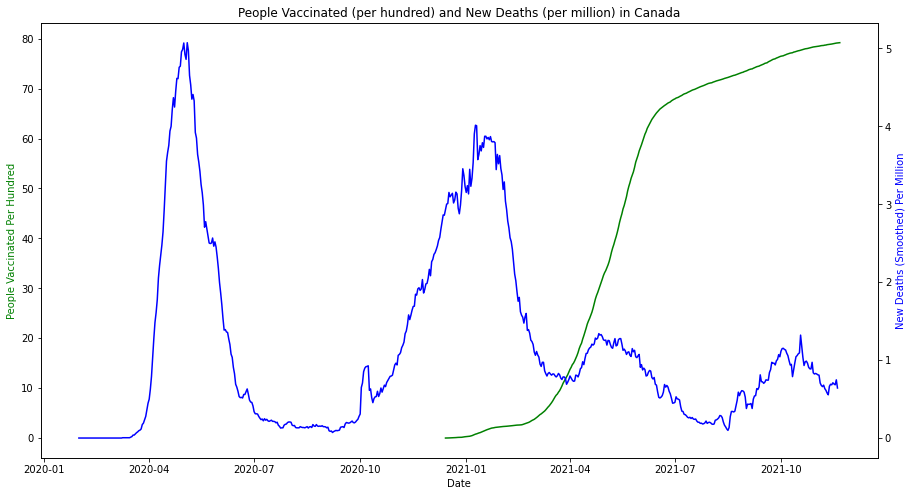

In [95]:
#Plot graph 

df_Canada = df[df['location']=='Canada']
date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_Canada['date']]

df_complete_Canada = df_complete[df_complete['location']=='Canada']
date_objects_complete = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_complete_Canada['date']]

fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()
ax1.plot(date_objects, df_Canada['people_vaccinated_per_hundred'], 'g-')
ax2.plot(date_objects_complete, df_complete_Canada['new_deaths_smoothed_per_million'], 'b-')

plt.title('People Vaccinated (per hundred) and New Deaths (per million) in Canada')
ax1.set_xlabel('Date')
ax1.set_ylabel('People Vaccinated Per Hundred', color='g')
ax2.set_ylabel('New Deaths (Smoothed) Per Million', color='b')

plt.show()

From this graph, we see that there is a sharp increase in people_vaccinated between 2021-01 and 2021-07. At this same time period, there is a sharp decrease in new_deaths. This can suggest that there is a negative correlation between these two features and that people_vaccinated can influence the new_deaths.

Determine correlation between these two features

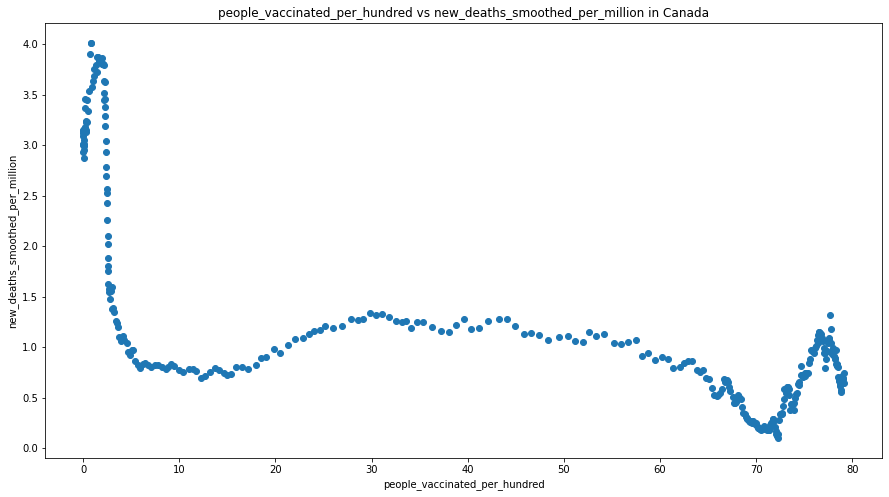

In [96]:
#Create dataframe to show only these two feature columns
df_Canada_new = df_Canada.loc[:,['date','people_vaccinated_per_hundred']].loc[df_Canada['date']< '2021-11-20']
df_complete_Canada_new = df_complete_Canada.loc[:,['date','new_deaths_smoothed_per_million']].loc[df_complete_Canada['date']> '2020-12-13']
df_complete_Canada_new['people_vaccinated_per_hundred'] = df_Canada_new['people_vaccinated_per_hundred'].values
df_complete_Canada_new

#Plot people_vaccinated_per_hundred vs new_deaths_smoothed_per_million
plt.figure(figsize=(15,8))
plt.title('people_vaccinated_per_hundred vs new_deaths_smoothed_per_million in Canada')
plt.scatter(df_complete_Canada_new['people_vaccinated_per_hundred'], df_complete_Canada_new['new_deaths_smoothed_per_million'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('new_deaths_smoothed_per_million')

plt.show()

In [97]:
#find covariance

covariance = np.cov(df_complete_Canada_new['people_vaccinated_per_hundred'], df_complete_Canada_new['new_deaths_smoothed_per_million'])[0,1]
print('In Canada, the covariance people_vaccinated_per_hundred and new_deaths_smoothed_per_million:', covariance)


In Canada, the covariance people_vaccinated_per_hundred and new_deaths_smoothed_per_million: -23.68263404053821


There is a negative correlation between the people_vaccinated and new_deaths. This means that as the people_vaccinated increases, the number of deaths decreases. 

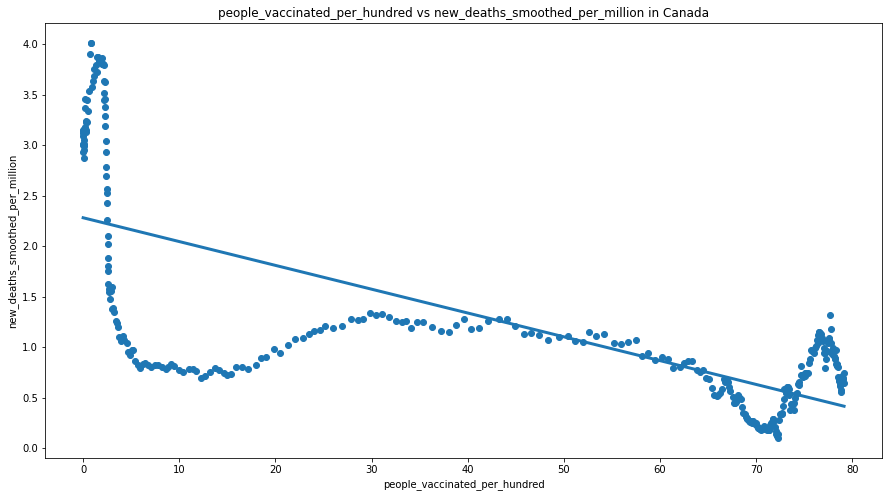

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(df_complete_Canada_new['people_vaccinated_per_hundred']).reshape((-1, 1)), df_complete_Canada_new['new_deaths_smoothed_per_million'].values)
new_deaths_Canada_predict = model.predict(np.array(df_complete_Canada_new['people_vaccinated_per_hundred']).reshape((-1, 1)))

#Plot people_vaccinated_per_hundred vs new_deaths_smoothed_per_million
plt.figure(figsize=(15,8))
plt.title('people_vaccinated_per_hundred vs new_deaths_smoothed_per_million in Canada')
plt.scatter(df_complete_Canada_new['people_vaccinated_per_hundred'], df_complete_Canada_new['new_deaths_smoothed_per_million'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('new_deaths_smoothed_per_million')
plt.plot(np.array(df_complete_Canada_new['people_vaccinated_per_hundred']).reshape((-1, 1)), new_deaths_Canada_predict, linewidth = 3)

plt.show()

In [99]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(np.array(df_complete_Canada_new['new_deaths_smoothed_per_million']).reshape(-1,1), new_deaths_Canada_predict.reshape(-1,1), squared=False)
print("The RMSE of the model is:", round(rmse, 2))

The RMSE of the model is: 0.72


Using a linear regression model, we see that there is a negative interdependence between the two features. 

In [100]:
print("The coefficient of the linear regression model is:", model.coef_[0])

The coefficient of the linear regression model is: -0.023588012761521535


##USA

###Compare people_vaccinated and new_cases_smoothed

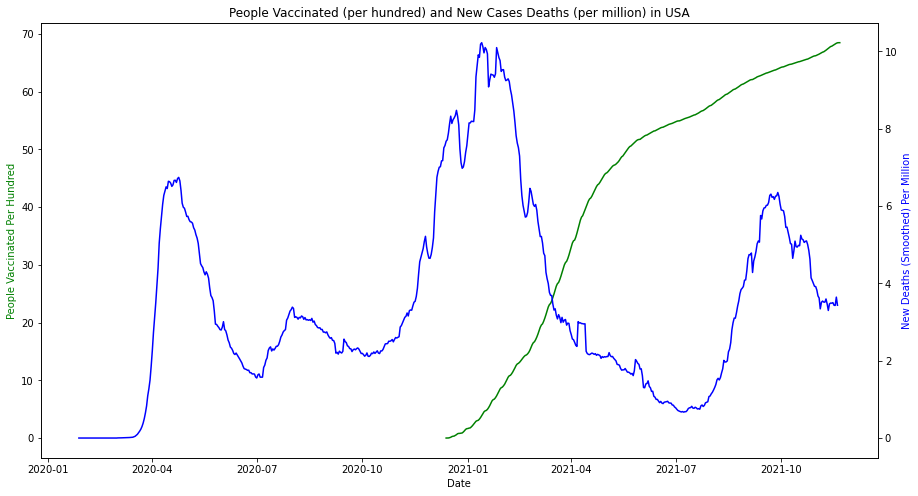

In [101]:
#Plot graph 

df_USA = df[df['location']=='United States']
date_objects = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_USA['date']]

df_complete_USA = df_complete[df_complete['location']=='United States']
date_objects_complete = [datetime.strptime(date,'%Y-%m-%d').date() for date in df_complete_USA['date']]

fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()
ax1.plot(date_objects, df_USA['people_vaccinated_per_hundred'], 'g-')
ax2.plot(date_objects_complete, df_complete_USA['new_deaths_smoothed_per_million'], 'b-')

plt.title('People Vaccinated (per hundred) and New Cases Deaths (per million) in USA')
ax1.set_xlabel('Date')
ax1.set_ylabel('People Vaccinated Per Hundred', color='g')
ax2.set_ylabel('New Deaths (Smoothed) Per Million', color='b')

plt.show()

Similar to Canada,, we see that there is a sharp increase in people_vaccinated between 2021-01 and 2021-04. There is a drop in new_deaths at around 2021-02 and 2021-07. Ie. there is a time lag between the sharp increase in people_vaccinated and the decrease in new_deaths. This can suggest that the effect on new_deaths from people_vaccinated takes some time.  This can suggest that there is a negative correlation between these two features and that people_vaccinated can influence the new_deaths.

Determine correlation between these two features

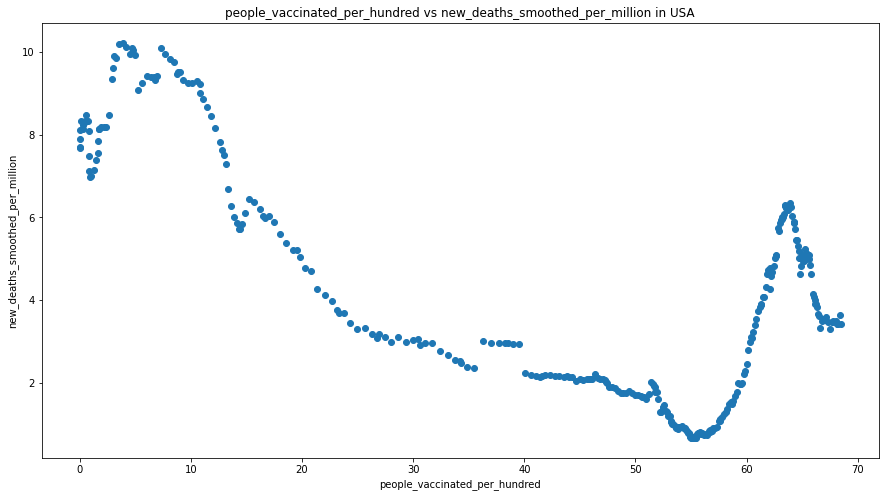

In [102]:
#Create dataframe to show only these two feature columns
df_USA_new = df_USA.loc[:,['date','people_vaccinated_per_hundred']].loc[df_USA['date']< '2021-11-20']
df_complete_USA_new = df_complete_USA.loc[:,['date','new_deaths_smoothed_per_million']].loc[df_complete_USA['date']> '2020-12-12']
df_complete_USA_new['people_vaccinated_per_hundred'] = df_USA_new['people_vaccinated_per_hundred'].values
df_complete_USA_new

#Plot people_vaccinated_per_hundred vs new_deaths_smoothed_per_million
plt.figure(figsize=(15,8))
plt.title('people_vaccinated_per_hundred vs new_deaths_smoothed_per_million in USA')
plt.scatter(df_complete_USA_new['people_vaccinated_per_hundred'], df_complete_USA_new['new_deaths_smoothed_per_million'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('new_deaths_smoothed_per_million')

plt.show()

In [103]:
#find covariance

covariance = np.cov(df_complete_USA_new['people_vaccinated_per_hundred'], df_complete_USA_new['new_deaths_smoothed_per_million'])[0,1]
print('In USA, the covariance people_vaccinated_per_hundred and new_deaths_smoothed_per_million:', covariance)


In USA, the covariance people_vaccinated_per_hundred and new_deaths_smoothed_per_million: -41.78313040438337


There is a negative correlation between the people_vaccinated and new_deaths. This means that as the people_vaccinated increases, the number of deaths decreases. 

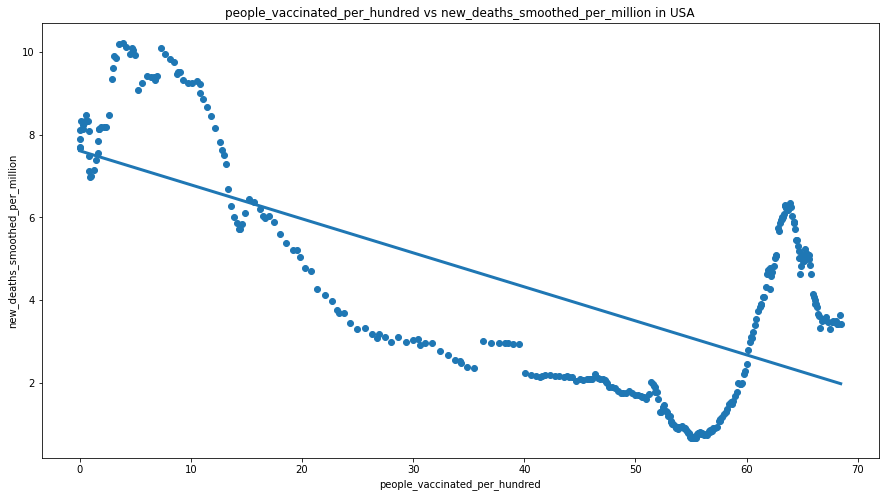

In [104]:
model = LinearRegression()
model.fit(np.array(df_complete_USA_new['people_vaccinated_per_hundred']).reshape((-1, 1)), df_complete_USA_new['new_deaths_smoothed_per_million'].values)
new_deaths_USA_predict = model.predict(np.array(df_complete_USA_new['people_vaccinated_per_hundred']).reshape((-1, 1)))

#Plot people_vaccinated_per_hundred vs new_deaths_smoothed_per_million
plt.figure(figsize=(15,8))
plt.title('people_vaccinated_per_hundred vs new_deaths_smoothed_per_million in USA')
plt.scatter(df_complete_USA_new['people_vaccinated_per_hundred'], df_complete_USA_new['new_deaths_smoothed_per_million'])
plt.xlabel('people_vaccinated_per_hundred')
plt.ylabel('new_deaths_smoothed_per_million')
plt.plot(np.array(df_complete_USA_new['people_vaccinated_per_hundred']).reshape((-1, 1)), new_deaths_USA_predict, linewidth = 3)

plt.show()

In [105]:
rmse = mean_squared_error(np.array(df_complete_USA_new['new_deaths_smoothed_per_million']).reshape(-1,1), new_deaths_USA_predict.reshape(-1,1), squared=False)
print("The RMSE of the model is:", round(rmse, 2))

The RMSE of the model is: 2.06


Again, we see a negative interdependence between the two variables using a linear regression model. 

In [106]:
print("The coefficient of the linear regression model is:", model.coef_[0])

The coefficient of the linear regression model is: -0.08219801162141595


#Part 5 Deriving insights about the effect of vaccination and discussion

Q. The effect of vaccination on our daily lives

A. From Part 4, we see that vaccinations negatively impact the new deaths. As seen in the graph comparing people_vaccinated and new_deaths, the trend in new_deaths generally decrease as the number of people_vaccinated increases. This is also shown with the covariance calculation's negative result. This can support the statement that vaccines can positively affect people from dying due to this disease. 

From Part 3, we see that the number of people vaccinated is not increasing as rapidly as in the begnning when the vaccines were first introduced. This impacts our model, because the forecast over the next 50 days show an increase in total_vaccinations but the increase is not much high. Knowing from Part 4 that vaccines negatively impact new_deaths, this may slower rate may be concerning. 


Q. Which of your chosen countries has the most effective vaccination program? From what aspects?

A. Between Canada and USA, Canada has a more effective vaccination program in terms of these aspects:

- Canada currently has a value of people_vaccinated_per_hundred of 80, while USA only has a value of 70. This means that more Canadians are vaccinated than Americans.

- Using the base case results from the models in Part 3, we forecast in the next 50 days that 30685471 Canadians will be vaccinated (81% of Canada's population of 37894799) and we forecast that 244195248 Americans will be vaccinated (73.5% of America's population of 332,278,200). 

- Canada currently has new_deaths_smoothed_per_million of 1 while USA has 4. 


However, USA has a more effective vaccination program in terms of these aspects:

- The covariance of people_vaccinated_per_hundred and new_deaths_smoothed_per_million is -42 in USA while in Canada is -24. This suggests that vaccines have a higher negative impact on new_deaths in USA.

- Using the base case results from the models in Part 3, we forecast that the number of people_vaccinated in Canada over the next 50 days will increase by 533,265 (1.7% increase from current) while USA will increase by 13,896,504 (6% increase from current). USA's forecasted percent increase is higher which may suggest that USA has a better expected vaccination program in the next 50 days. 



Q. What discoveries have you made as a result of the dataset and your models?
- From Part 2:
- Canada's vaccination rates are lower than they were before when they were first introduced in around 2021-03 and 2021-07. 
- Canada's number of people vaccinated is also not increasing as rapidly as they were before. 
- The vaccination rates and total vaccinations are highest in countries with the highest population (ex. China, India, USA, Brazil). 
- However, when we consider people vaccinated per hundred (which standardizes the values to account for the difference in country populations), we see that these countries are no longer the top 10 in this metric (see Figure 1). This may suggest that population does not necessarily correlate with the number of people that are vaccinated in that country. 

- From Part 3:
- We see that the forecast of people vaccinated in Canada is similar between the worst and best case (30668170 and 31202771) which is because of the low CI of 15% used. If we selected a higher CI, the worst case would drop to a value below the current number of people vaccinated, which would not make sense. The ARIMA model projects similar worst and best cases because the percent increase over the next 50 days with the base case is only 1.7%. The percent increase using the worst case is 0.05% while the percent increase using the best case is 3% (again, due to the low 15% CI). 
- With USA, the highest possible CI is 40%. One reason being that the percent increase over the next 50 days is 6%, so the worst case without having a negative increase is 0.1%. With this 40% CI, the best case scenario is a percent increase of 11.9%. 
- We can see that the forecast growth rate using the ARIMA model is dependent on the current and previous growth rate seen in the dataset. For example, USA's people_vaccinated has a higher growth rate than Canada's as seen in the time-series graphs. This allows the forecast of the base case of USA to be at 6%, while the forecast of the base case of Canada to be only 1.7%. 




